# Continuous request every 3 seconds to UL API
* Saved to vehicleDict with timestamp as key and all corresponding vehicle data as a list (value)
* Only including vehicles assigned to a trip

In [ ]:
from google.transit import gtfs_realtime_pb2
import sched, time
import requests

s = sched.scheduler(time.time, time.sleep)

vehicleDict = {}

def requestVehiclePositions(sc): 
    feed = gtfs_realtime_pb2.FeedMessage()
    response = requests.get('https://opendata.samtrafiken.se/ul/VehiclePositions.pb?key=8e90cd12622a49449e473869721ca908')
    feed.ParseFromString(response.content)
    
    vehicleDict[feed.header.timestamp]=[]
    
    for entity in feed.entity:
        if entity.vehicle.trip.trip_id:       
            vehicleDict[feed.header.timestamp].append({
                                'vehicleID':entity.id,
                                'trip':entity.vehicle.trip.trip_id,
                                'lat':entity.vehicle.position.latitude,
                                'lon':entity.vehicle.position.longitude,
                                'speed':entity.vehicle.position.speed,
                                'bearing':entity.vehicle.position.bearing,
                                'timestamp':entity.vehicle.timestamp
                               })
        s.enter(3, 1, requestVehiclePositions, (sc,))

s.enter(3, 1, requestVehiclePositions, (s,))
s.run()

### Entity example

In [37]:
id: "273264818"
vehicle {
  trip {
    trip_id: "33010000131097724"
    schedule_relationship: SCHEDULED
  }
  position {
    latitude: 59.862300872802734
    longitude: 17.61636734008789
    bearing: 307.0
    speed: 6.900000095367432
  }
  timestamp: 1582290372
  vehicle {
    id: "9031003000500833"
  }
}

SyntaxError: invalid syntax (<ipython-input-37-31819ff148c5>, line 2)

### Speed density calculation for all vehicles

Text(0, 0.5, 'Number of vehicles')

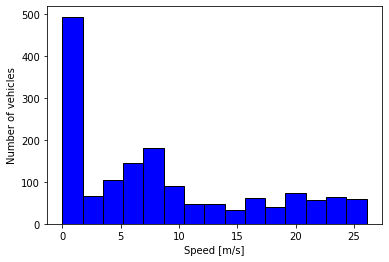

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

speedDensity = []

for key in vehicleDict:
    for vehicle in vehicleDict[key]:
        speedDensity.append(vehicle['speed'])

plt.hist(speedDensity, color = 'blue', edgecolor = 'black',
         bins = 15)
plt.xlabel('Speed [m/s]')
plt.ylabel('Number of vehicles')